In [22]:
#Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
import plotly.express as px
from countries_dataset import countries
from codes import country_codes
sns.set_theme()

# Set large float displaying options in pandas
pd.options.display.float_format = '{:20,.2f}'.format


In [23]:
#Import excel files after initial row cleaning

#Production data in thousands 60kg bags
df_production = pd.read_excel('datasets/1a - Total production.xlsx',skiprows=3,skipfooter=3) 
df_production['Country'] = df_production['Country'].str.lstrip()
df_production['Code'] = df_production['Country'].map(country_codes)
df_production['Continent'] = df_production['Country'].map(countries)

#Domestic Consumption data in thousands 60kg bags
df_consumption = pd.read_excel('datasets/1b - Domestic consumption.xlsx',skiprows=3,skipfooter=3) 
df_consumption['Country'] = df_consumption['Country'].str.lstrip()
df_consumption['Code'] = df_consumption['Country'].map(country_codes)
df_consumption['Continent'] = df_consumption['Country'].map(countries)

#Gross Openings 
df_openings = pd.read_excel('datasets/1d - Gross Opening stocks.xlsx',skiprows=3,skipfooter=3) 
df_openings['Country'] = df_openings['Country'].str.lstrip()
df_openings['Code'] = df_openings['Country'].map(country_codes)
df_openings['Continent'] = df_openings['Country'].map(countries)

#Exports in thousands 60kg bags
df_exports = pd.read_excel('datasets/1e - Exports - crop year.xlsx',skiprows=3,skipfooter=3) 
df_exports['Country'] = df_exports['Country'].str.lstrip()
df_exports['Code'] = df_exports['Country'].map(country_codes)
df_exports['Continent'] = df_exports['Country'].map(countries)

#Imports in thousands 60kg bags
df_imports = pd.read_excel('datasets/2b - Imports.xlsx',skiprows=3,skipfooter=3) 
df_imports['Country'] = df_imports['Country'].str.lstrip()
df_imports['Code'] = df_imports['Country'].map(country_codes)
df_imports['Continent'] = df_imports['Country'].map(countries)

d:\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

d:\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



In [24]:
# Create a function that return the top10s for each dataframe with a barplot

def top10s(df):
    top10 = df[['Country','Code','Totals']].sort_values(by='Totals', ascending=False).head(10)
    # plot the top 10 producing countries with Seaborn using a bar chart
    sns.barplot(x='Country', y='Totals', data=top10)
    # Edit y axis with "Total 60kg bags in thousands"
    plt.ylabel('Total 60kg bags in thousands')
    # Edit the x axis countries to display them diagonally
    plt.xticks(rotation=45)
    plt.show()
    return top10

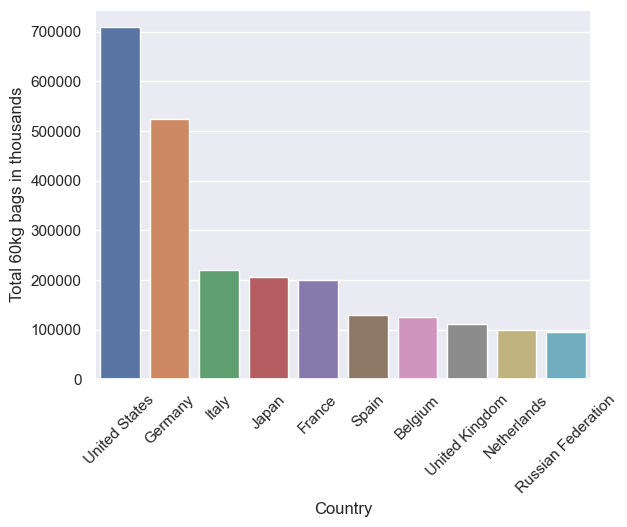

               Country Code               Totals
33       United States  USA           708,460.33
11             Germany  DEU           524,689.62
15               Italy  ITA           221,201.34
27               Japan  JPN           207,046.56
10              France  FRA           199,539.46
25               Spain  ESP           130,676.54
1              Belgium  BEL           124,974.14
32      United Kingdom  GBR           112,193.59
19         Netherlands  NLD            99,189.06
29  Russian Federation  NaN            95,517.85


In [25]:
top10_imports = top10s(df_imports)
print(top10_imports)

In [26]:
# Create docstring for world_plot
''' Create a figure using Plotly Express' `px.choropleth` function '''

def world_plot(df):
    fig = px.choropleth(
        df,
        locations='Code',
        color='Totals',
        hover_name='Country',
        color_continuous_scale='YlGn',
        range_color=(0, 1500000),
        scope='world',
    )

    # Update the layout of the figure
    fig.update_layout(
        title='Totals by Country',
        margin={'r': 0, 't': 40, 'l': 0, 'b': 10},
    )

    # Show the figure
    fig.show()

In [27]:
world_plot(df_imports)